In [1]:
%load_ext autoreload
%autoreload 2

import numpy  as np
import pandas as pd
import h5py

import ehtplot
from matplotlib import pyplot as plt, cm

from common import dalt
from common import hallmark as hm
from common import viz

In [2]:
indices = ['mag', 'aspin', 'Rhigh', 'inc']

def get(m):
    def read(f, t, s, d):
        return pd.read_csv(m+f'/stat_{f}_{t}.tsv', sep='\t', usecols=indices+[s]).rename(columns={s:d}).set_index(indices)

    return pd.concat([
        read('86GHz',  'lc',    'med', 'Fnu_86GHz'   ),
        read('86GHz',  'major', 'med', 'major_86GHz' ),
        read('230GHz', 'mi3',   'med', 'mi3_230GHz'  ),
        read('230GHz', 'major', 'med', 'major_230GHz'),
        read('230GHz', 'minor', 'med', 'minor_230GHz'),
        read('NIR',    'sed',   'med', 'Fnu_NIR'     ),
        read('xray',   'sed',   'med', 'nuLnu_xray'  ),
        # mring radius
        # mring width
        # mring asymmetry
        # null locations
    ], axis=1)

df = get('cache/Illinois_thermal_w5')

for k in indices:
    globals()[k] = df.reset_index()[k].unique()
    print(k, globals()[k][:16])
    
def edges(i):
    m = (i[1:] + i[:-1]) / 2
    l = [2*i[ 0] - m[ 0]]
    r = [2*i[-1] - m[-1]]
    return np.concatenate([l, m, r])

magmap = {'M':'MAD', 'S':'SANE'}

Rhigh_edges = 10**edges(np.log10(Rhigh))
inc_edges = edges(inc)

mag ['M' 'S']
aspin [-0.94 -0.5   0.    0.5   0.94]
Rhigh [  1  10  40 160]
inc [ 10  30  50  70  90 110 130 150 170]


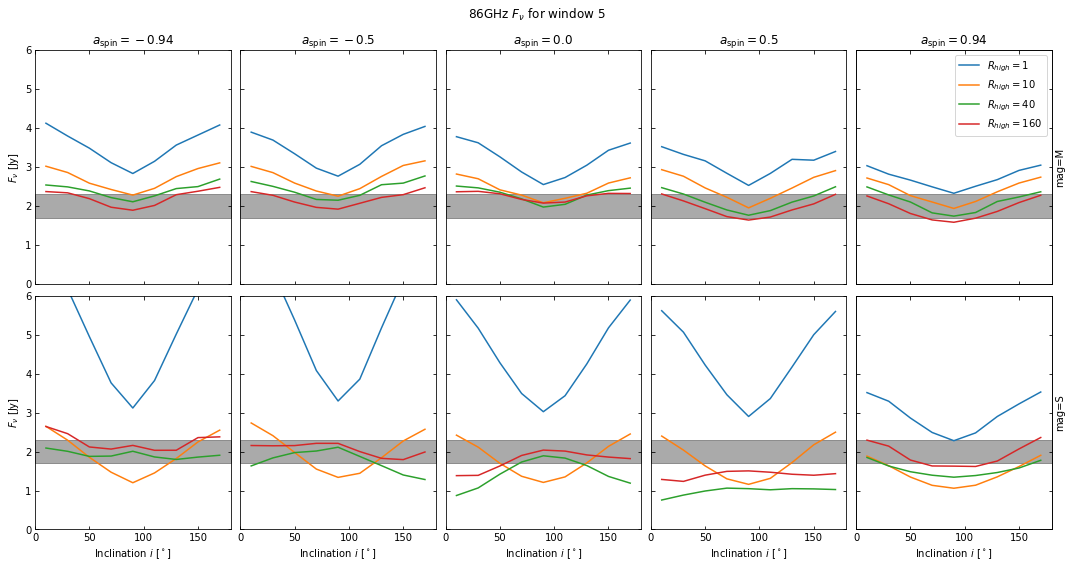

In [3]:
def plot(ax, df):
    for Rh in Rhigh:
        sel = df(Rhigh=Rh)
        ax.plot(sel.inc, sel.Fnu_86GHz, label=f'$R_{{high}}={Rh}$')
    ax.set_ylim(0, 6)
    ax.set_xlim(0, 180)
    ax.fill_between([0,180], 1.7, 2.3, color='k', alpha=1/3)
    
fig = viz.grid(
    df.reset_index(), plot, aspin=aspin, mag=mag,
    figsize=(15,8), title=f'86GHz $F_{{\\nu}}$ for window 5',
    xspace=0.05, yspace=0.05,
    legend='upper right',
    xtitle=r'$a_\mathrm{{spin}}={}$',     ytitle=r'mag={}',
    xlabel=r'Inclination $i$ [$^\circ$]', ylabel=r'$F_\nu$ [Jy]',
    fout=f'output/plot/constraint_Fnu_86GHz',
)

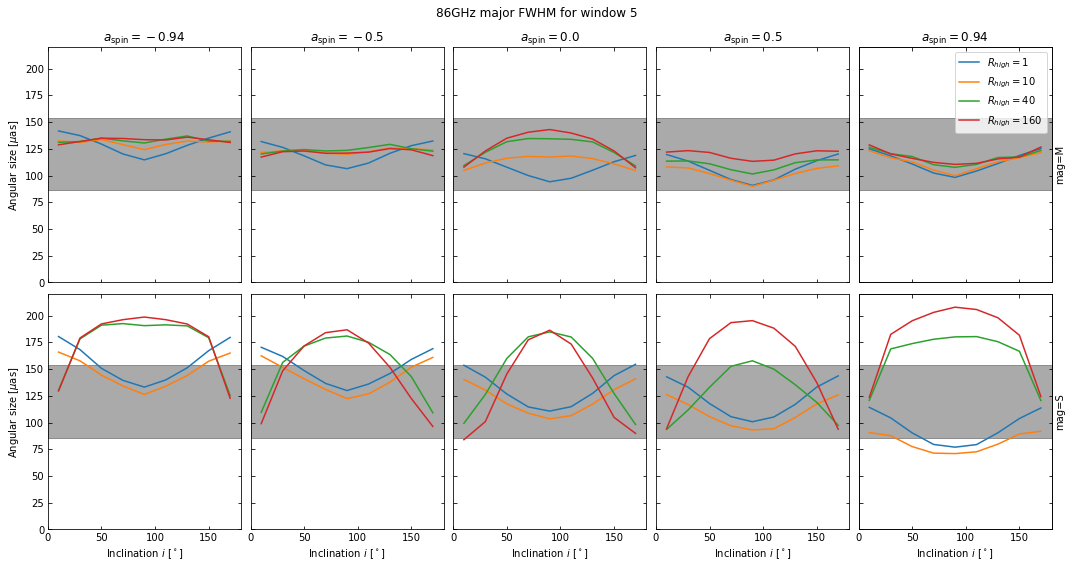

In [4]:
def plot(ax, df):
    for Rh in Rhigh:
        sel = df(Rhigh=Rh)
        ax.plot(sel.inc, sel.major_86GHz, label=f'$R_{{high}}={Rh}$')
    ax.set_ylim(0, 220)
    ax.set_xlim(0, 180)
    ax.fill_between([0,180], 86, 154, color='k', alpha=1/3)
    
fig = viz.grid(
    df.reset_index(), plot, aspin=aspin, mag=mag,
    figsize=(15,8), title=f'86GHz major FWHM for window 5',
    xspace=0.05, yspace=0.05,
    legend='upper right',
    xtitle=r'$a_\mathrm{{spin}}={}$',     ytitle=r'mag={}',
    xlabel=r'Inclination $i$ [$^\circ$]', ylabel=r'Angular size [$\mu$as]',
    fout=f'output/plot/constraint_major_86GHz',
)

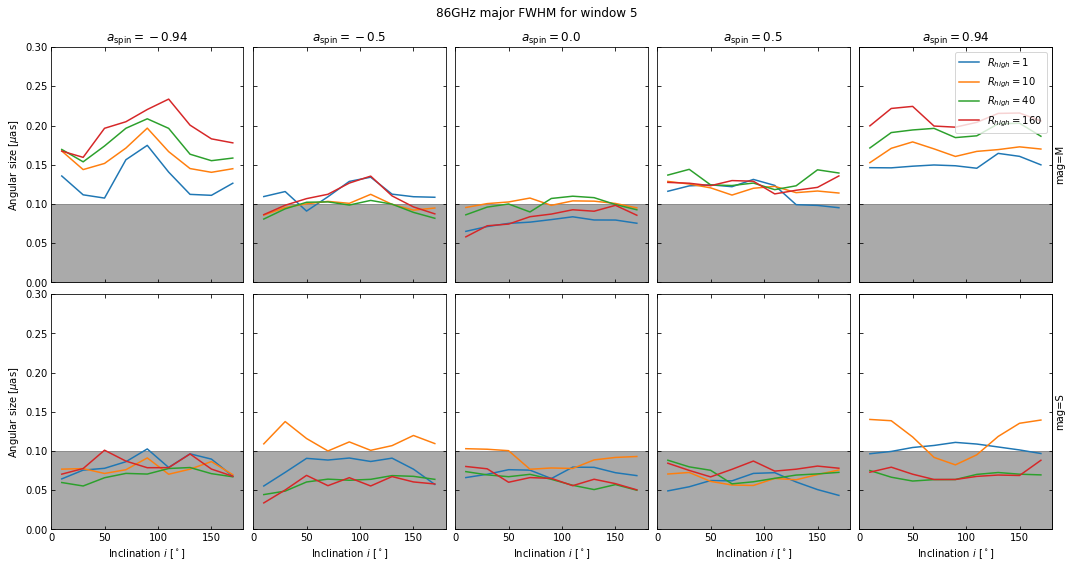

In [5]:
def plot(ax, df):
    for Rh in Rhigh:
        sel = df(Rhigh=Rh)
        ax.plot(sel.inc, sel.mi3_230GHz, label=f'$R_{{high}}={Rh}$')
    ax.set_ylim(0, 0.3)
    ax.set_xlim(0, 180)
    ax.fill_between([0,180], 0, 0.1, color='k', alpha=1/3)
    
fig = viz.grid(
    df.reset_index(), plot, aspin=aspin, mag=mag,
    figsize=(15,8), title=f'86GHz major FWHM for window 5',
    xspace=0.05, yspace=0.05,
    legend='upper right',
    xtitle=r'$a_\mathrm{{spin}}={}$',     ytitle=r'mag={}',
    xlabel=r'Inclination $i$ [$^\circ$]', ylabel=r'Angular size [$\mu$as]',
    fout=f'output/plot/constraint_mi3_230GHz',
)

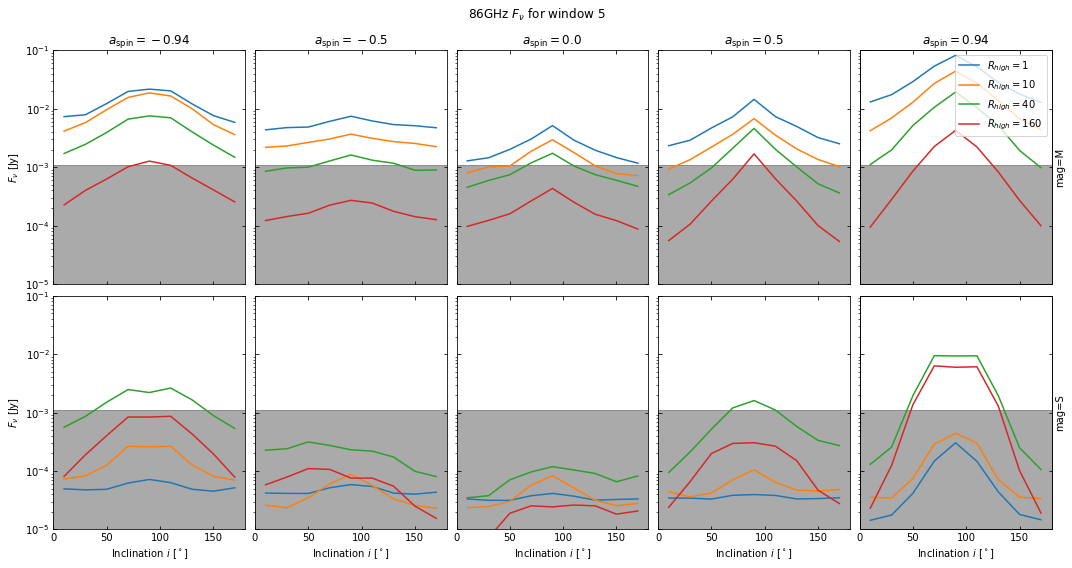

In [6]:
def plot(ax, df):
    for Rh in Rhigh:
        sel = df(Rhigh=Rh)
        ax.plot(sel.inc, sel.Fnu_NIR, label=f'$R_{{high}}={Rh}$')
    ax.set_yscale('log')
    ax.set_ylim(1e-5, 1e-1)
    ax.set_xlim(0, 180)
    ax.fill_between([0,180], 1.1e-3, color='k', alpha=1/3)
    
fig = viz.grid(
    df.reset_index(), plot, aspin=aspin, mag=mag,
    figsize=(15,8), title=f'86GHz $F_{{\\nu}}$ for window 5',
    xspace=0.05, yspace=0.05,
    legend='upper right',
    xtitle=r'$a_\mathrm{{spin}}={}$',     ytitle=r'mag={}',
    xlabel=r'Inclination $i$ [$^\circ$]', ylabel=r'$F_\nu$ [Jy]',
    fout=f'output/plot/constraint_Fnu_NIR',
)

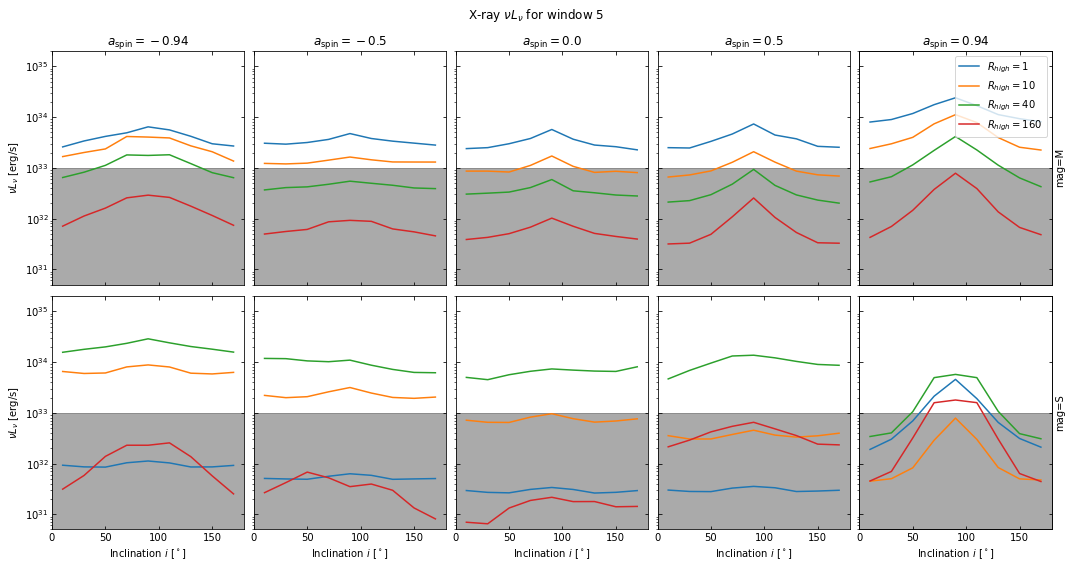

In [7]:
def plot(ax, df):
    for Rh in Rhigh:
        sel = df(Rhigh=Rh)
        ax.plot(sel.inc, sel.nuLnu_xray, label=f'$R_{{high}}={Rh}$')
    ax.set_yscale('log')
    ax.set_ylim(5e30, 2e35)
    ax.set_xlim(0, 180)
    ax.fill_between([0,180], 1e33, color='k', alpha=1/3)
    
fig = viz.grid(
    df.reset_index(), plot, aspin=aspin, mag=mag,
    figsize=(15,8), title=f'X-ray $\\nu L_{{\\nu}}$ for window 5',
    xspace=0.05, yspace=0.05,
    legend='upper right',
    xtitle=r'$a_\mathrm{{spin}}={}$',     ytitle=r'mag={}',
    xlabel=r'Inclination $i$ [$^\circ$]', ylabel=r'$\nu L_\nu$ [erg/s]',
    fout=f'output/plot/constraint_nuLnu_xray',
)